## Module 1.3: Texture Analysis

In this section, we will observe how our samples distributed according to texture features by visualization.

In [1]:
# import libraries

import numpy as np # numerical / matrix library
import pandas as pd # dataset / excel manipulation
import matplotlib.pyplot as plt # drawing chart, plotting

from skimage.io import imread # read image file
from skimage.transform import resize # resizing image file

# from skimage.color import rgb2gray # convert RGB image to single channel (grayscale) image
from skimage.feature import hog # to extract the histogram of oriented gradient

In [2]:
# load our new dataset

csv_file = 'data/austin_newzone.csv'

# load csv file as data frame

df = pd.read_csv(csv_file)

### Section 3.1: Texture Characteristic

Let's define a new vector that represents our image texture characteristics. Among a number of alternatives, for this example, let's use histogram of oriented gradient.

In [3]:
# a function to extract color feature 

def hog_feature(img):
    return hog(img, orientations=9, pixels_per_cell=(8, 8), 
               cells_per_block=(3, 3),  
               visualize=False, multichannel=True)

In [4]:
# extract feature from images
# iterate over files

Y = []
X = []

# iterate over dataset 
for i, d in df.iterrows():
    
    img_file = d['image_name'] # get image file name
    label = d['new_zone'] # get new_zone label
    
    img = imread(img_file) # read image file
    feature = hog_feature(img)
    
    X.append(feature)
    Y.append(label)
    
    print(i, end=' ') # print progress
    
X = np.array(X)
Y = np.array(Y)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [5]:
# check a few samples

count = 0
for x, y in zip(X, Y):
    print(x.round(2), y)
    count += 1
    if count == 15:
        break

[0.21 0.02 0.05 ... 0.04 0.06 0.09] SPECIAL
[0.08 0.04 0.02 ... 0.07 0.04 0.14] RESIDENTIAL
[0.08 0.01 0.05 ... 0.06 0.03 0.05] SPECIAL
[0.14 0.03 0.04 ... 0.08 0.08 0.08] SPECIAL
[0.17 0.09 0.07 ... 0.   0.03 0.03] UNKNOWN
[0.13 0.03 0.12 ... 0.08 0.06 0.05] SPECIAL
[0.17 0.03 0.1  ... 0.09 0.06 0.06] SPECIAL
[0.2  0.02 0.08 ... 0.11 0.13 0.1 ] SPECIAL
[0.17 0.2  0.06 ... 0.19 0.16 0.17] SPECIAL
[0.2  0.11 0.17 ... 0.08 0.09 0.06] COMMERCIAL
[0.12 0.05 0.08 ... 0.12 0.06 0.05] RESIDENTIAL
[0.08 0.05 0.06 ... 0.04 0.08 0.06] RESIDENTIAL
[0.21 0.05 0.06 ... 0.07 0.22 0.08] RESIDENTIAL
[0.12 0.03 0.07 ... 0.08 0.03 0.02] SPECIAL
[0.16 0.01 0.04 ... 0.11 0.08 0.06] SPECIAL


### Section 3.2: Principal Component Analysis

This part demonstrates how to apply PCA for data visualization.

In [6]:
# import library for PCA

from sklearn.decomposition import PCA

In [7]:
# transform 6 features into 3 features which retains most of the variance

pca = PCA(n_components=3)
pca.fit(X)

transformed_X = pca.transform(X)

In [8]:
# print few samples

count = 0
for x, y in zip(transformed_X, Y):
    print(x.round(2), y)
    count += 1
    if count == 15:
        break

[-1.07  4.07  1.82] SPECIAL
[  0.5  -21.49 -15.16] RESIDENTIAL
[-3.7   6.71 -4.56] SPECIAL
[-4.34  7.23 -1.9 ] SPECIAL
[-0.66 -6.45  4.54] UNKNOWN
[-5.67 -2.17 -7.32] SPECIAL
[-4.53  1.24 -2.46] SPECIAL
[-8.15 -1.73 -9.23] SPECIAL
[-2.14 -0.    2.44] SPECIAL
[ 2.47  5.78 11.41] COMMERCIAL
[-2.34 -0.35 -1.32] RESIDENTIAL
[-4.91  6.45 -1.19] RESIDENTIAL
[-5.13  5.98 -2.14] RESIDENTIAL
[-5.08  5.84 -1.97] SPECIAL
[-6.24  5.37 -5.11] SPECIAL


#### Scatter Plot of Transformed Images

The first part of the plot considers no differentiation among classes. The second plot gives different annotation for each class.

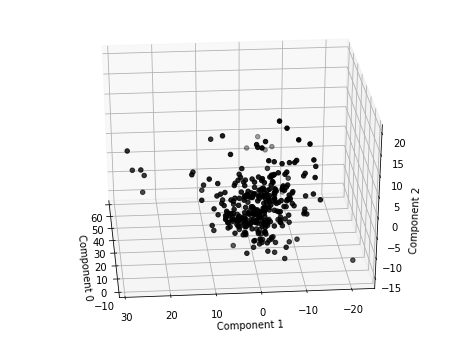

In [9]:
# import special library for 3d plot

from mpl_toolkits.mplot3d import Axes3D

# define required objects

fig = plt.figure(figsize=(8,6))
axe = fig.add_subplot(1, 1, 1, projection='3d') # grid size = 1x1x1

# draw scatter plot

axe.scatter(transformed_X[:,0], transformed_X[:,1], transformed_X[:,2], 
            c='black', marker='o')

# set axis labels

axe.set_xlabel('Component 0')
axe.set_ylabel('Component 1')
axe.set_zlabel('Component 2')

# need a better point of view? here is the setting

axe.view_init(elev=30., azim=175)

plt.show()

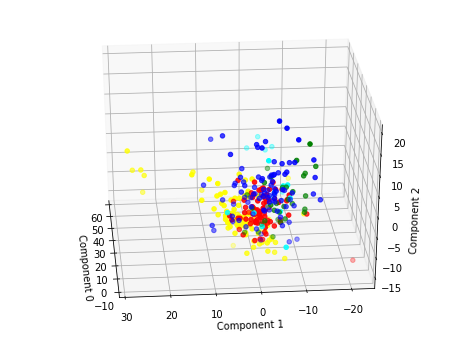

In [10]:
# import special library for 3d plot

from mpl_toolkits.mplot3d import Axes3D

# define required objects

fig = plt.figure(figsize=(8,6))
axe = fig.add_subplot(1, 1, 1, projection='3d') # grid size = 1x1x1

# draw scatter plot for each class

axe.scatter(transformed_X[Y == 'RESIDENTIAL'][:,0], 
            transformed_X[Y == 'RESIDENTIAL'][:,1], 
            transformed_X[Y == 'RESIDENTIAL'][:,2], 
            c='red', marker='o')

axe.scatter(transformed_X[Y == 'COMMERCIAL'][:,0], 
            transformed_X[Y == 'COMMERCIAL'][:,1], 
            transformed_X[Y == 'COMMERCIAL'][:,2], 
            c='blue', marker='o')

axe.scatter(transformed_X[Y == 'INDUSTRIAL'][:,0], 
            transformed_X[Y == 'INDUSTRIAL'][:,1], 
            transformed_X[Y == 'INDUSTRIAL'][:,2], 
            c='green', marker='o')

axe.scatter(transformed_X[Y == 'SPECIAL'][:,0], 
            transformed_X[Y == 'SPECIAL'][:,1], 
            transformed_X[Y == 'SPECIAL'][:,2], 
            c='yellow', marker='o')

axe.scatter(transformed_X[Y == 'UNKNOWN'][:,0], 
            transformed_X[Y == 'UNKNOWN'][:,1], 
            transformed_X[Y == 'UNKNOWN'][:,2], 
            c='cyan', marker='o')

# set axis labels

axe.set_xlabel('Component 0')
axe.set_ylabel('Component 1')
axe.set_zlabel('Component 2')

# need a better point of view? here is the setting

axe.view_init(elev=30., azim=175)

plt.show()